In [1]:
#Load libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Load Dataset
drugdata = pd.read_csv('./drugdataset.csv')

#display first 10 rows 
drugdata.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,1,2,1,25.355,drugY
1,47,0,1,1,13.093,drugC
2,47,0,1,1,10.114,drugC
3,28,1,0,1,7.798,drugX
4,61,1,1,1,18.043,drugY
5,22,1,0,1,8.607,drugX
6,49,1,0,1,16.275,drugY
7,41,0,1,1,11.037,drugC
8,60,0,0,1,15.171,drugY
9,43,0,1,0,19.368,drugY


In [4]:
#Load Dataset
drugdata = pd.read_csv('./drugdataset.csv')

#display last 10 rows 
drugdata.tail(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
190,58,0,2,1,18.991,drugY
191,23,0,2,1,8.011,drugA
192,72,0,1,1,16.310,drugY
193,72,0,1,1,6.769,drugC
194,46,1,2,1,34.686,drugY
195,56,1,1,1,11.567,drugC
196,16,0,1,1,12.006,drugC
197,52,0,0,1,9.894,drugX
198,23,0,0,0,14.020,drugX
199,40,1,1,0,11.349,drugX


In [5]:
#Create x and y variables as features and target
x=drugdata.drop('Drug', axis=1).to_numpy()   # let X equals Features
y=drugdata['Drug'].to_numpy()  # let Y equals Target

In [7]:
# create training and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=55)

# Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)


In [12]:
# Import graph libraries for ploting a confusion matrix graph for better visual representation of the models
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Red', cbar=False,
                xticklabels=target_names, yticklabels=target_names)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Estimator: SVM
[[ 3  0  0  0  0]
 [ 2  2  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 15  1]
 [ 0  1  0  0 15]]
              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         3
       drugB       0.67      0.50      0.57         4
       drugC       1.00      1.00      1.00         1
       drugX       1.00      0.94      0.97        16
       drugY       0.94      0.94      0.94        16

    accuracy                           0.90        40
   macro avg       0.84      0.88      0.85        40
weighted avg       0.91      0.90      0.90        40



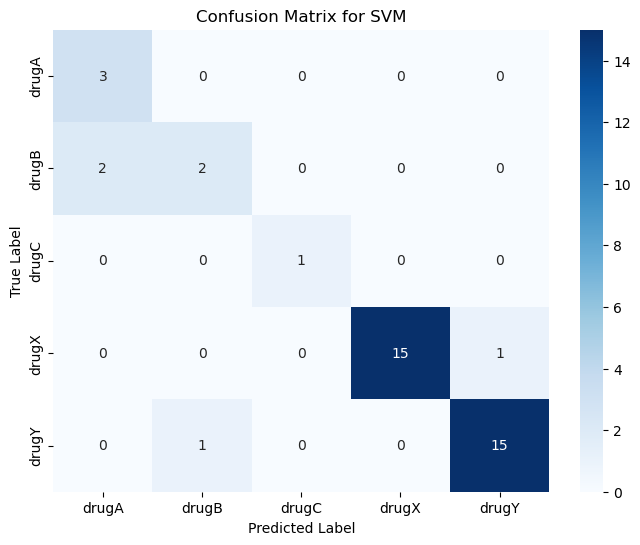


Estimator: Naive Bayes
[[ 3  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0 15  1]
 [ 2  2  0  0 12]]
              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         3
       drugB       0.67      1.00      0.80         4
       drugC       1.00      1.00      1.00         1
       drugX       1.00      0.94      0.97        16
       drugY       0.92      0.75      0.83        16

    accuracy                           0.88        40
   macro avg       0.84      0.94      0.87        40
weighted avg       0.91      0.88      0.88        40



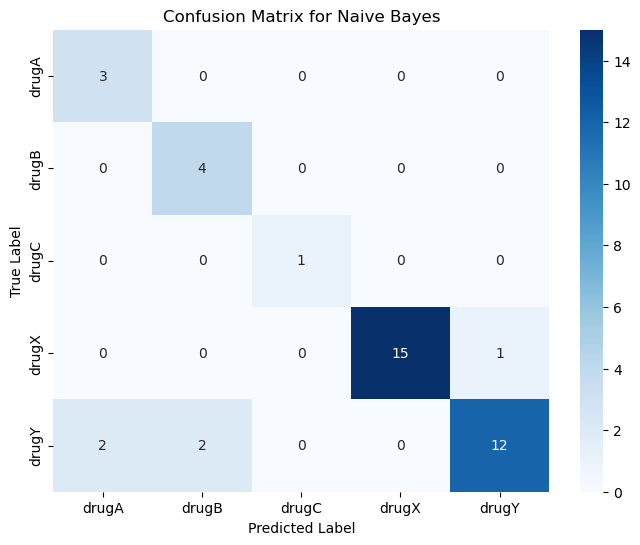

In [11]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define target names for clarity in the reports and confusion matrix
target_names = ['drugA', 'drugB', 'drugC', 'drugX', 'drugY']

# Loop through both SVM and Naive Bayes classifiers
for name, method in [('SVM', SVC(kernel='linear', random_state=100)),
                     ('Naive Bayes', GaussianNB())]: 
    # Train the model
    method.fit(x_train2, y_train)
    
    # Predict on the test set
    predict = method.predict(x_test2)
    
    # Print the model name
    print(f'\nEstimator: {name}')
    
    # Print the confusion matrix
    cm = confusion_matrix(y_test, predict)
    print(cm)
    
    # Print the classification report
    print(classification_report(y_test, predict, target_names=target_names))
    
    # Plot the confusion matrix using seaborn heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
